In [1]:
import pandas as pd
import numpy as np

import matplotlib as plt
from matplotlib import figure
from matplotlib import *
import sys
from pylab import *
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, StratifiedKFold, RandomizedSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.metrics import classification_report, confusion_matrix,  accuracy_score
from sklearn import metrics

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier



In [2]:
pd.set_option('display.max_rows', 500)     # Setting Maximum rows displayed as 500
pd.set_option('display.max_columns', 500)  # Setting Maximum rcolumns displayed as 500
pd.set_option('display.width', 1000)       # Setting Maximum width displayed as 1000

In [3]:
df = pd.read_csv("train.csv")  # Importing .csv file and creating the dataframe
df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [4]:
df.describe() # detailed description of the training dataset

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000

In [5]:
df.info(verbose=True, show_counts=True) # info of the training data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    id                        69999 non-null  int64  
 1    circle_id                 69999 non-null  int64  
 2    loc_og_t2o_mou            69297 non-null  float64
 3    std_og_t2o_mou            69297 non-null  float64
 4    loc_ic_t2o_mou            69297 non-null  float64
 5    last_date_of_month_6      69999 non-null  object 
 6    last_date_of_month_7      69600 non-null  object 
 7    last_date_of_month_8      69266 non-null  object 
 8    arpu_6                    69999 non-null  float64
 9    arpu_7                    69999 non-null  float64
 10   arpu_8                    69999 non-null  float64
 11   onnet_mou_6               67231 non-null  float64
 12   onnet_mou_7               67312 non-null  float64
 13   onnet_mou_8               66296 non-null  fl

In [6]:
df_t1 = pd.read_csv("test (1).csv")  # importing .csv file and creating the test dataset
df_t1.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,103,90,60,50,30,30,6/21/2014,7/26/2014,8/24/2014,30,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,500,500,500,250,250,250,6/19/2014,7/16/2014,8/24/2014,250,0,0,NaN,NaN,Na

## Preparing Data

### Checking Null Values and treating the variables 

In [7]:
null_columns=df.columns[df.isnull().any()] # This will create a list of all the variables with some null values in the dataframe
df[null_columns].isnull().sum()

loc_og_t2o_mou                702
std_og_t2o_mou                702
loc_ic_t2o_mou                702
last_date_of_month_7          399
last_date_of_month_8          733
onnet_mou_6                  2768
onnet_mou_7                  2687
onnet_mou_8                  3703
offnet_mou_6                 2768
offnet_mou_7                 2687
offnet_mou_8                 3703
roam_ic_mou_6                2768
roam_ic_mou_7                2687
roam_ic_mou_8                3703
roam_og_mou_6                2768
roam_og_mou_7                2687
roam_og_mou_8                3703
loc_og_t2t_mou_6             2768
loc_og_t2t_mou_7             2687
loc_og_t2t_mou_8             3703
loc_og_t2m_mou_6             2768
loc_og_t2m_mou_7             2687
loc_og_t2m_mou_8             3703
loc_og_t2f_mou_6             2768
loc_og_t2f_mou_7             2687
loc_og_t2f_mou_8             3703
loc_og_t2c_mou_6             2768
loc_og_t2c_mou_7             2687
loc_og_t2c_mou_8             3703
loc_og_mou_6  

In [8]:
dfnull = df[df.isna().any(axis=1)] # Creating a dataframe of the rows with any null values
dfnull

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.00,0.0,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.00,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.00,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.00,0.00,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.00,0.00,0.00,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.00,0.00,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.00,0.00,0.00,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,

In [9]:
item_counts = df["churn_probability"].value_counts() # checking the distribution of the target variable of the entire data set
item_counts

0    62867
1     7132
Name: churn_probability, dtype: int64

In [10]:
item_counts_null = dfnull["churn_probability"].value_counts() # checking the distribution of the target variable of the major null values from the data set
item_counts_null

0    52805
1     6910
Name: churn_probability, dtype: int64

In [11]:
xlist_mou6 = df[df.columns[df.isnull().sum()==2768]]  # this will ceate a new datafrane of all month "6" MOU features
xlist_mou6 = xlist_mou6.select_dtypes(exclude=['object']) # This will remove thw object type features that is the dates
xlist_mou6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   onnet_mou_6       67231 non-null  float64
 1   offnet_mou_6      67231 non-null  float64
 2   roam_ic_mou_6     67231 non-null  float64
 3   roam_og_mou_6     67231 non-null  float64
 4   loc_og_t2t_mou_6  67231 non-null  float64
 5   loc_og_t2m_mou_6  67231 non-null  float64
 6   loc_og_t2f_mou_6  67231 non-null  float64
 7   loc_og_t2c_mou_6  67231 non-null  float64
 8   loc_og_mou_6      67231 non-null  float64
 9   std_og_t2t_mou_6  67231 non-null  float64
 10  std_og_t2m_mou_6  67231 non-null  float64
 11  std_og_t2f_mou_6  67231 non-null  float64
 12  std_og_t2c_mou_6  67231 non-null  float64
 13  std_og_mou_6      67231 non-null  float64
 14  isd_og_mou_6      67231 non-null  float64
 15  spl_og_mou_6      67231 non-null  float64
 16  og_others_6       67231 non-null  float6

In [12]:
xlist_mou7 = df[df.columns[df.isnull().sum()==2687]]  # this will ceate a new datafrane of all month "7" MOU features
xlist_mou7 = xlist_mou7.select_dtypes(exclude=['object']) # This will remove thw object type features that is the dates
xlist_mou7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   onnet_mou_7       67312 non-null  float64
 1   offnet_mou_7      67312 non-null  float64
 2   roam_ic_mou_7     67312 non-null  float64
 3   roam_og_mou_7     67312 non-null  float64
 4   loc_og_t2t_mou_7  67312 non-null  float64
 5   loc_og_t2m_mou_7  67312 non-null  float64
 6   loc_og_t2f_mou_7  67312 non-null  float64
 7   loc_og_t2c_mou_7  67312 non-null  float64
 8   loc_og_mou_7      67312 non-null  float64
 9   std_og_t2t_mou_7  67312 non-null  float64
 10  std_og_t2m_mou_7  67312 non-null  float64
 11  std_og_t2f_mou_7  67312 non-null  float64
 12  std_og_t2c_mou_7  67312 non-null  float64
 13  std_og_mou_7      67312 non-null  float64
 14  isd_og_mou_7      67312 non-null  float64
 15  spl_og_mou_7      67312 non-null  float64
 16  og_others_7       67312 non-null  float6

In [13]:
xlist_mou8 = df[df.columns[df.isnull().sum()==3703]]  # this will ceate a new datafrane of all month "8" MOU features
xlist_mou8 = xlist_mou8.select_dtypes(exclude=['object']) # This will remove thw object type features that is the dates
xlist_mou8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   onnet_mou_8       66296 non-null  float64
 1   offnet_mou_8      66296 non-null  float64
 2   roam_ic_mou_8     66296 non-null  float64
 3   roam_og_mou_8     66296 non-null  float64
 4   loc_og_t2t_mou_8  66296 non-null  float64
 5   loc_og_t2m_mou_8  66296 non-null  float64
 6   loc_og_t2f_mou_8  66296 non-null  float64
 7   loc_og_t2c_mou_8  66296 non-null  float64
 8   loc_og_mou_8      66296 non-null  float64
 9   std_og_t2t_mou_8  66296 non-null  float64
 10  std_og_t2m_mou_8  66296 non-null  float64
 11  std_og_t2f_mou_8  66296 non-null  float64
 12  std_og_t2c_mou_8  66296 non-null  float64
 13  std_og_mou_8      66296 non-null  float64
 14  isd_og_mou_8      66296 non-null  float64
 15  spl_og_mou_8      66296 non-null  float64
 16  og_others_8       66296 non-null  float6

In [14]:
xlist_data6 = df[df.columns[df.isnull().sum()==52431]]  # this will ceate a new datafrane of all month "6" data features
xlist_data6 = xlist_data6.select_dtypes(exclude=['object']) # This will remove thw object type features that is the dates
xlist_data6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   total_rech_data_6   17568 non-null  float64
 1   max_rech_data_6     17568 non-null  float64
 2   count_rech_2g_6     17568 non-null  float64
 3   count_rech_3g_6     17568 non-null  float64
 4   av_rech_amt_data_6  17568 non-null  float64
 5   arpu_3g_6           17568 non-null  float64
 6   arpu_2g_6           17568 non-null  float64
 7   night_pck_user_6    17568 non-null  float64
 8   fb_user_6           17568 non-null  float64
dtypes: float64(9)
memory usage: 4.8 MB


In [15]:
xlist_data7 = df[df.columns[df.isnull().sum()==52134]]  # this will ceate a new datafrane of all month "7" data features
xlist_data7 = xlist_data7.select_dtypes(exclude=['object']) # This will remove thw object type features that is the dates
xlist_data7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   total_rech_data_7   17865 non-null  float64
 1   max_rech_data_7     17865 non-null  float64
 2   count_rech_2g_7     17865 non-null  float64
 3   count_rech_3g_7     17865 non-null  float64
 4   av_rech_amt_data_7  17865 non-null  float64
 5   arpu_3g_7           17865 non-null  float64
 6   arpu_2g_7           17865 non-null  float64
 7   night_pck_user_7    17865 non-null  float64
 8   fb_user_7           17865 non-null  float64
dtypes: float64(9)
memory usage: 4.8 MB


In [16]:
xlist_data8 = df[df.columns[df.isnull().sum()==51582]]  # this will ceate a new datafrane of all month "8" data features
xlist_data8 = xlist_data8.select_dtypes(exclude=['object']) # This will remove thw object type features that is the dates
xlist_data8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   total_rech_data_8   18417 non-null  float64
 1   max_rech_data_8     18417 non-null  float64
 2   count_rech_2g_8     18417 non-null  float64
 3   count_rech_3g_8     18417 non-null  float64
 4   av_rech_amt_data_8  18417 non-null  float64
 5   arpu_3g_8           18417 non-null  float64
 6   arpu_2g_8           18417 non-null  float64
 7   night_pck_user_8    18417 non-null  float64
 8   fb_user_8           18417 non-null  float64
dtypes: float64(9)
memory usage: 4.8 MB


In [17]:
xlist_mou_t2o = df[df.columns[df.isnull().sum()==702]]  # this will ceate a new datafrane of all month "7" data features
xlist_mou_t2o = xlist_mou_t2o.select_dtypes(exclude=['object']) # This will remove thw object type features that is the dates
xlist_mou_t2o.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   loc_og_t2o_mou  69297 non-null  float64
 1   std_og_t2o_mou  69297 non-null  float64
 2   loc_ic_t2o_mou  69297 non-null  float64
dtypes: float64(3)
memory usage: 1.6 MB


In [18]:
# Creating a list of all nullvalue features from the above dataframes and combining them
mou6 = list(xlist_mou6)
mou7 = list(xlist_mou7)
mou8 = list(xlist_mou8)

data6 = list(xlist_data6)
data7 = list(xlist_data7)
data8 = list(xlist_data8)

t2o_mou = list(xlist_mou_t2o)

x_list = mou6 + mou7 + mou8 + data6 + data7 + data8 + t2o_mou


Based on the domanin knowledge the MOU coulmn is Nan as there is no MOU recorded / used by the customer and hence can be imputed as "0" and also same can be implied to the data columns of all the months

In [19]:
# Filling all the Nan values of the above features as "0.0"
df[x_list] = df[x_list].fillna(value=0.0)


In [20]:
new_null_columns=df.columns[df.isnull().any()] # This will create a list of all the variables with some null values in the dataframe
df[new_null_columns].isnull().sum()

last_date_of_month_7          399
last_date_of_month_8          733
date_of_last_rech_6          1101
date_of_last_rech_7          1234
date_of_last_rech_8          2461
date_of_last_rech_data_6    52431
date_of_last_rech_data_7    52134
date_of_last_rech_data_8    51582
dtype: int64

We can see that now we only have dates as missing values 

In [21]:
df_t1[x_list] = df_t1[x_list].fillna(value=0.0)

In [22]:
new_null_columns=df_t1.columns[df_t1.isnull().any()] # This will create a list of all the variables with some null values in the dataframe
df_t1[new_null_columns].isnull().sum()

last_date_of_month_7          202
last_date_of_month_8          367
date_of_last_rech_6           506
date_of_last_rech_7           533
date_of_last_rech_8          1161
date_of_last_rech_data_6    22415
date_of_last_rech_data_7    22294
date_of_last_rech_data_8    22078
dtype: int64

Dropping dates of last recharge data as a lot of values are null and the feature is not of much importance

In [23]:
df.drop(['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8' ], axis=1, inplace=True) # dropping some unwanted features

In [24]:
df_t1.drop(['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8' ], axis=1, inplace=True) # dropping some unwanted features

#### Columns with unique values

In [25]:
unique_value_cols = df.columns[df.nunique() == 1] # Creating a list of features with only one unique value
uni_vals = list(unique_value_cols)
uni_vals

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8']

In [26]:
df.drop(uni_vals, axis=1, inplace=True) # Droping features with only 1 unique value from the train data set

In [27]:
df.shape

(69999, 156)

In [28]:
df_t1.drop(uni_vals, axis=1, inplace=True) # Droping features with only 1 unique value from the test data set

In [29]:
df_t1.shape

(30000, 155)

In [30]:
date_drop_last_rech = ['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']  # Droping some more unwanted variables
df.drop(date_drop_last_rech, axis=1, inplace=True)

In [31]:
df.shape # Checking the shape of train dataset before EDA

(69999, 153)

In [32]:
df_t1.drop(date_drop_last_rech, axis=1, inplace=True) #Droping a list of unwanted variables from the test dataset

In [33]:
df_t1.shape  # Checking the shape of test dataset before EDA

(30000, 152)

## EDA

In [34]:
targ = ['churn_probability']

In [35]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
hi_corr = [column for column in upper.columns if any(upper[column] > 0.70)]

# Drop features 
#df.drop(hi_corr, axis=1, inplace=True)

C:\Users\Omicium\AppData\Local\Temp/ipykernel_4800/1944305820.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [36]:
len(hi_corr) #Number of features with corelation higher than 0.95

82

In [37]:
hi_corr_list = list(hi_corr)
hi_corr_df = df.copy()  # Creating a copy of the training dataset for special observation of selected high correlation features
hi_corr_df.drop(hi_corr_list, axis = 1, inplace = True) # dropping high correlated features
hi_corr_df.head()

,id,arpu_6,onnet_mou_6,offnet_mou_6,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2f_mou_6,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,31.277,48.58,32.24,0.00,0.0,0.0,0.00,0.0,0.00,2.23,5.29,0.00,0.00,0.00,0.00,0.00,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,2.43,0.83,0.00,0.00,7.61,0.21,7.46,19.96,0.0,0.0,0.0,0.66,0.0,1.11,0.69,0.00,3,2,65,65,10,65,65,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0,0,0,1958,0.0,0.0,0.0,0
1,1,0.000,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,1.68,1.41,0.35,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.01,0.0,0.00,0.00,0.00,3,4,0,145,50,0,0,0,0.0,0.0,0.0,145.0,0.0,0.0,1.0,0.0,0.0,352.91,0.00,0.0,0.0,0.0,0,0,0,710,0.0,0.0,0.0,0
2,2,60.806,0.53,53.99,0.00,0.0,0.0,0.00,0.0,0.00,0.53,24.11,0.00,2.14,0.00,0.00,0.00,0.0,0.0,2.89,1.38,0.00,0.00,0.0,0.0,4.51,89.86,0.00,11.69,0.00,0.00,18.21,2.48,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.25,2,4,70,70,0,70,50,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0,0,0,882,0.0,0.0,0.0,0
3,3,156.362,7.26,68.76,0.00,0.0,0.0,0.00,0.0,1.63,6.99,37.91,0.00,0.00,0.00,8.03,0.56,0.0,0.0,14.95,9.13,25.61,0.00,0.0,0.0,24.98,53.99,7.23,0.00,0.00,0.00,8.89,0.28,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,2,4,110,110,50,110,110,50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0,0,0,982,0.0,0.0,0.0,0
4,4,240.708,21.28,56.99,53.64,0.0,0.0,15.73,0.0,0.00,10.16,36.74,11.99,0.00,9.85,0.00,0.00,0.0,0.0,0.00,17.00,0.00,0.00,0.0,0.0,5.44,10.58,5.51,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,13,10,50,41,30,25,10,30,7.0,6.0,25.0,41.0,25.0,0.0,1.0,0.0,390.8,308.89,213.47,0.0,0.0,0.0,0,0,0,647,0.0,0.0,0.0,0


In [38]:
hi_corr_df.shape # shape of the new copy of the training dataset after droping high correlated features

(69999, 71)

In [39]:
df.shape # Comparing to the shape of the original train dataset

(69999, 153)

In [40]:
total_df = df.filter(regex = 'total') # Filtering all features with the word total 
total_df.columns

Index(['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8'], dtype='object')

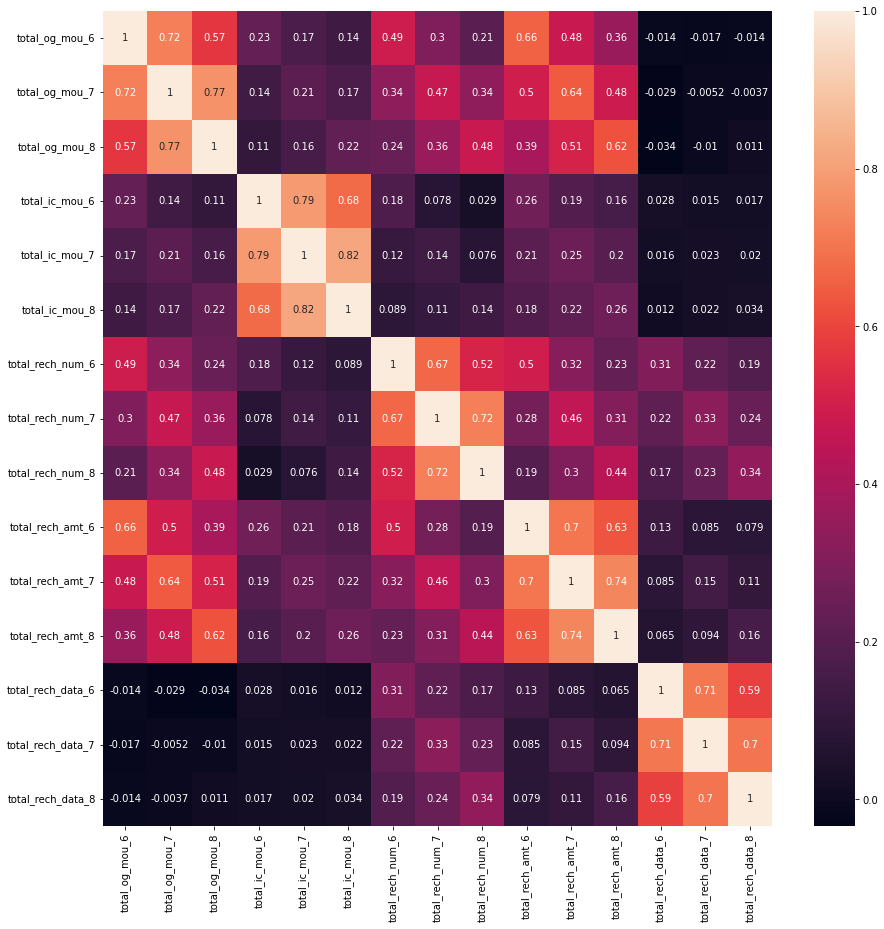

In [41]:
fig = plt.figure(figsize=(15, 15))
sns.heatmap(total_df.corr(), annot = True) # Creating a heat map
plt.show()

- It can bee seen that there is a high cooreation between the 7th and the 8th month features ranging from 70% to more than 80%

In [42]:
amt_df = df.filter(regex='amt') # filtering all features with the word amt
print(amt_df.columns)

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8'], dtype='object')


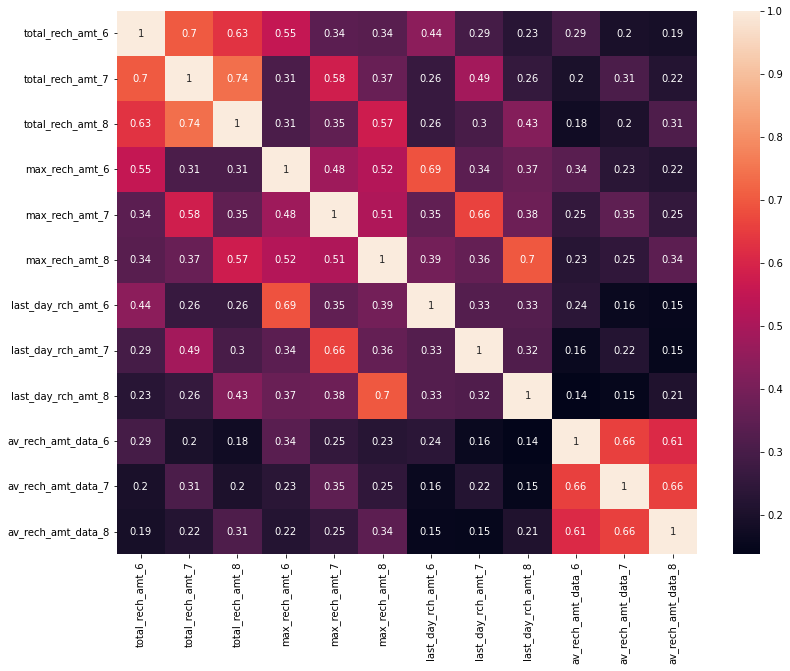

In [43]:
fig = plt.figure(figsize=(13, 10))
sns.heatmap(amt_df.corr(), annot = True) # plotting the heat map
plt.show()

- High correlation is seen between recharge amounts of 6th and 7th month also between the last day recharge amount and max reacharge amount

In [44]:
g3_df = df.filter(regex='3g') # Filtering all the features with 3g
print(g3_df.columns)

Index(['count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g'], dtype='object')


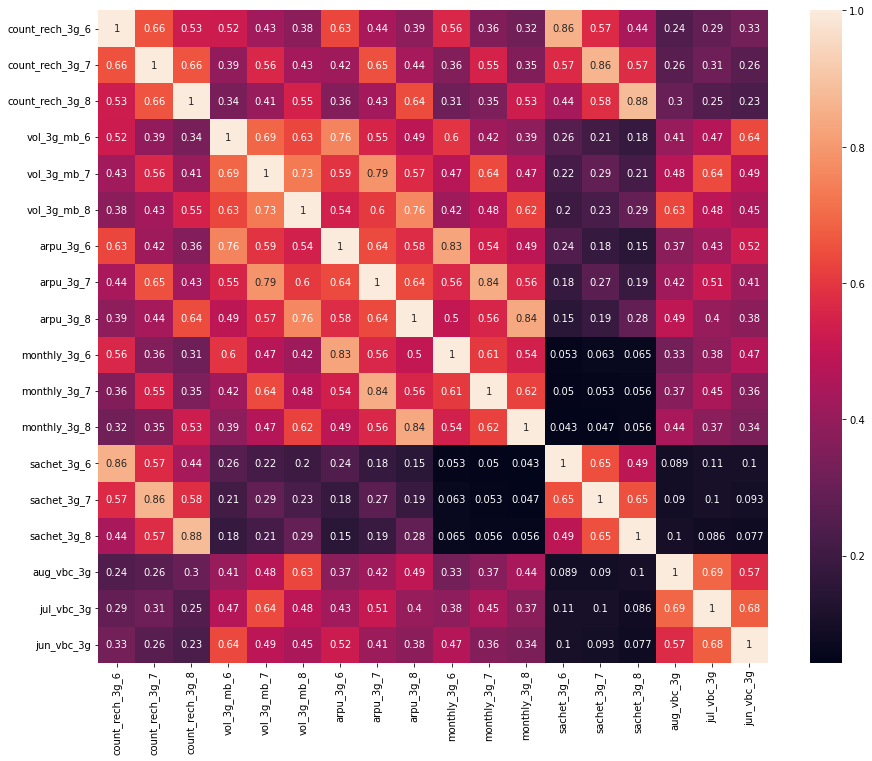

In [45]:
fig = plt.figure(figsize=(15, 12))
sns.heatmap(g3_df.corr(), annot = True) # plotting the heat map
plt.show()

- Scahet rechage, monthly 3g recharge and vbc have a really low corrrelation


In [46]:
g2_df = df.filter(regex='2g') # filtering all the features with 2g
print(g2_df.columns)

Index(['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8'], dtype='object')


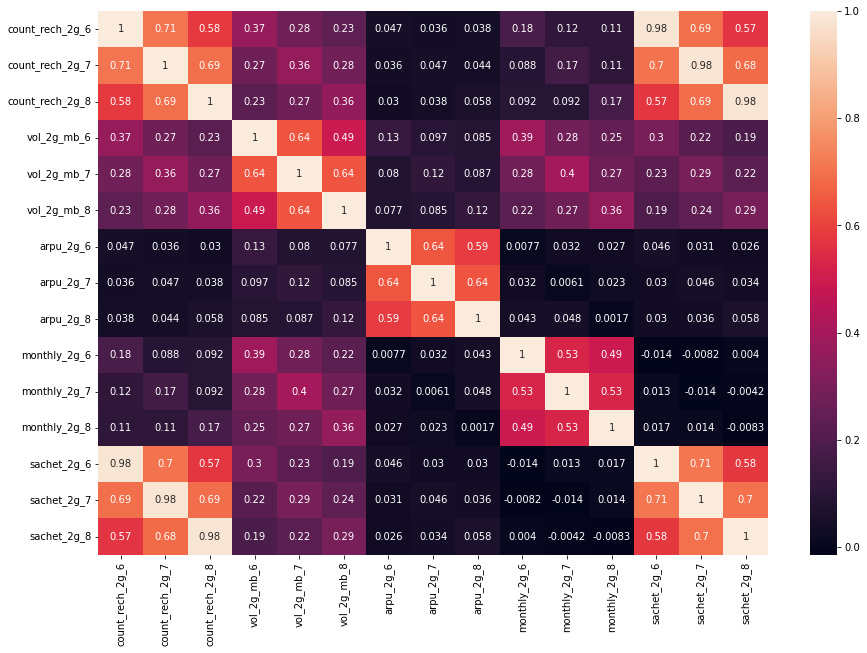

In [47]:
fig = plt.figure(figsize=(15, 10))
sns.heatmap(g2_df.corr(), annot = True) # creating a heat map
plt.show()

- It can be seen that 2g recharge monthly , arpu and sacht recharge have a very low coorelation

In [48]:
og_mou_df = df.filter(regex='og.*mou') # Filtering all the features with og and mou
print(og_mou_df.columns)

Index(['roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8'], dtype='object')


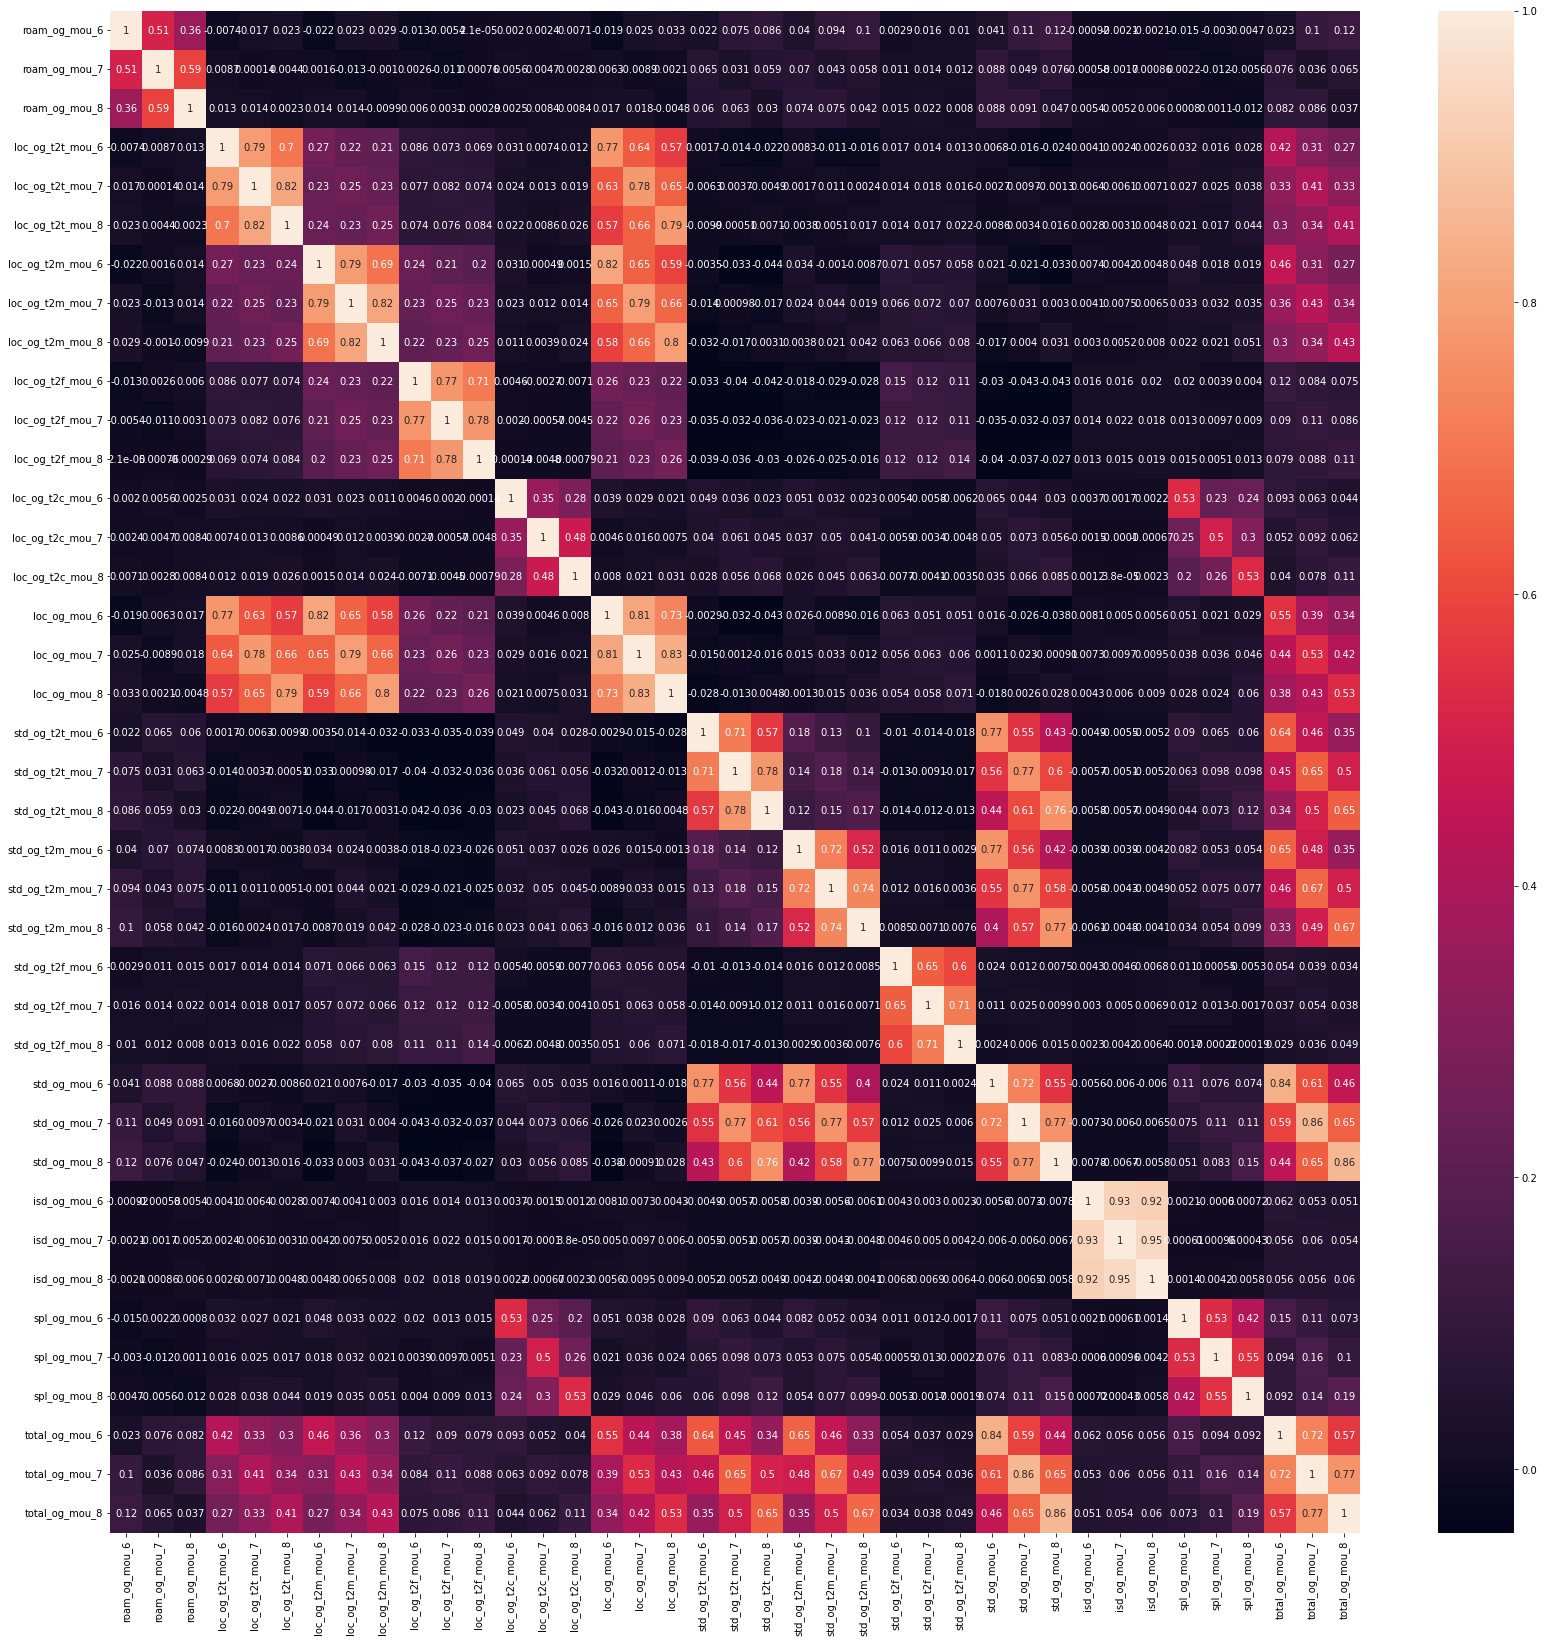

In [49]:
fig = plt.figure(figsize=(28, 28))
sns.heatmap(og_mou_df.corr(), annot = True) #creating a heat map
plt.show()

- It can be clearly seen that minutes of usage for t2t is really highly corealted to t2t and std and total mou 
- it can also be sen that the coorelation of ic calls is very low to the og calls 
- it is of paramount importane to know that the ic call does not help in improving the businees  and the features with og calls are highly important


In [52]:
rech_df = df.filter(regex = 'rech') # Filtering all the features with reach
print(rech_df.columns)

Index(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8'], dtype='object')


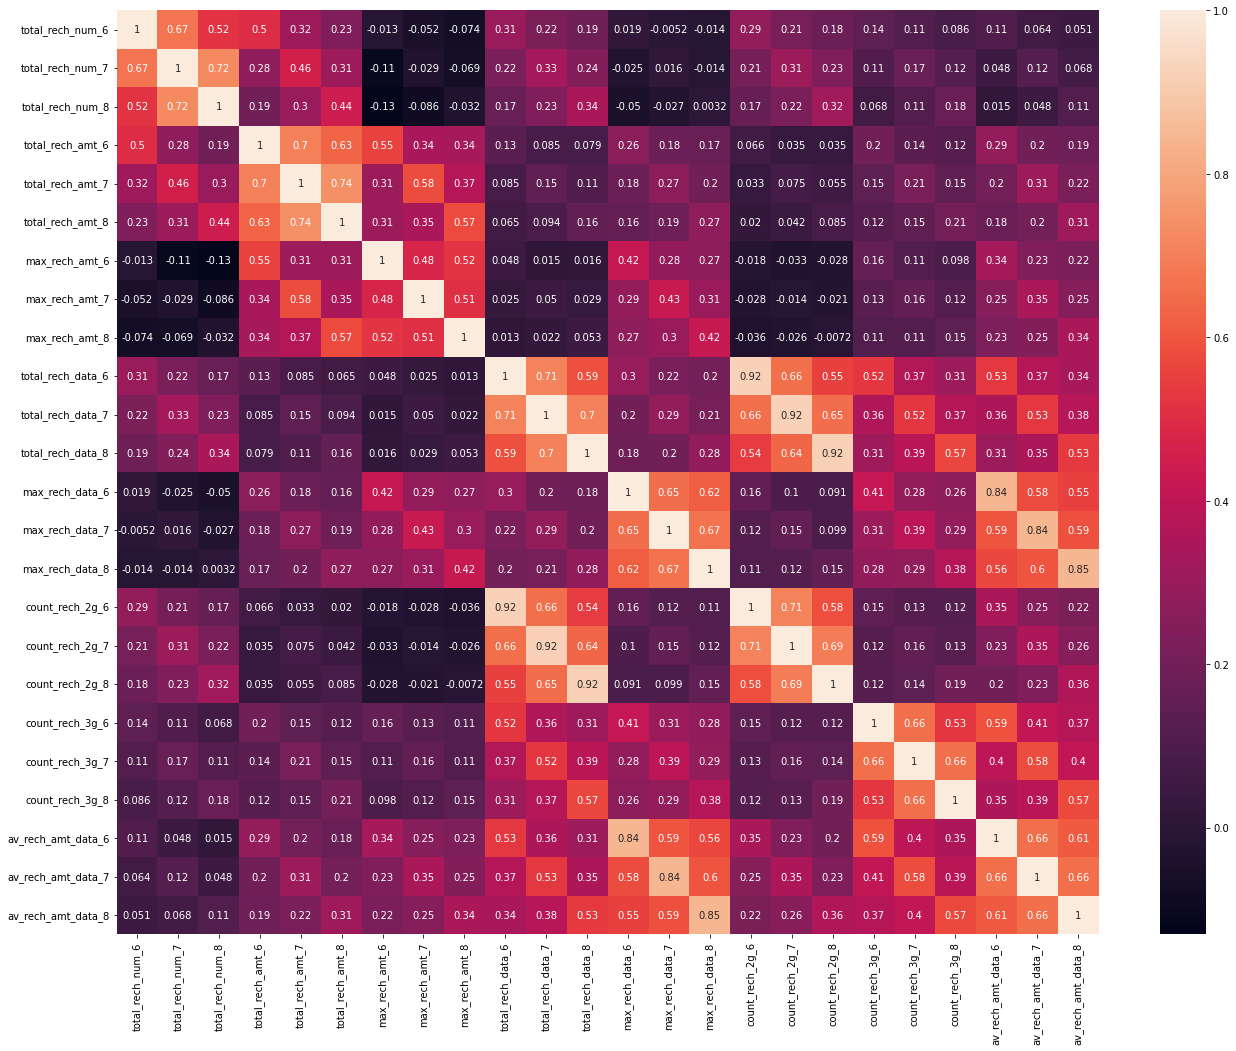

In [53]:
fig = plt.figure(figsize=(22, 17))
sns.heatmap(rech_df.corr(), annot = True) #craeting a heat map
plt.show()

- It can be seen that max rechhrge and total recharge are high ly correlated

In [54]:
def plot_set(col1, col2, col3, p1, p2, p3):
    plt.figure(figsize=(20, 18))
    if p1==1:
        plt.subplot(3,3,1)
        sns.barplot(x = 'churn_probability', y = col1, data = df)
        plt.subplot(3,3,2)
        sns.barplot(x = 'churn_probability', y = col2, data = df)
        plt.subplot(3,3,3)
        sns.barplot(x = 'churn_probability', y = col3, data = df)
    if p2 ==1:
        plt.subplot(3,3,4)
        sns.boxplot(x = 'churn_probability', y = col1, data = df)
        plt.subplot(3,3,5)
        sns.boxplot(x = 'churn_probability', y = col2, data = df)
        plt.subplot(3,3,6)
        sns.boxplot(x = 'churn_probability', y = col3, data = df)
    if p3 ==1:
        plt.subplot(3,3,7)
        sns.histplot(df[df['churn_probability'] == 0][col1], kde = True)
        sns.histplot(df[df['churn_probability'] == 1][col1], color = 'red', kde=True)
        plt.legend(['Not churn', 'churn'])
        plt.subplot(3,3,8)
        sns.histplot(df[df['churn_probability'] == 0][col2], kde = True)
        sns.histplot(df[df['churn_probability'] == 1][col2], color = 'red', kde=True)
        plt.legend(['Not churn', 'churn'])
        plt.subplot(3,3,9)
        sns.histplot(df[df['churn_probability'] == 0][col3], kde = True)
        sns.histplot(df[df['churn_probability'] == 1][col3], color = 'red', kde=True)
    plt.legend(['Not churn', 'churn'])

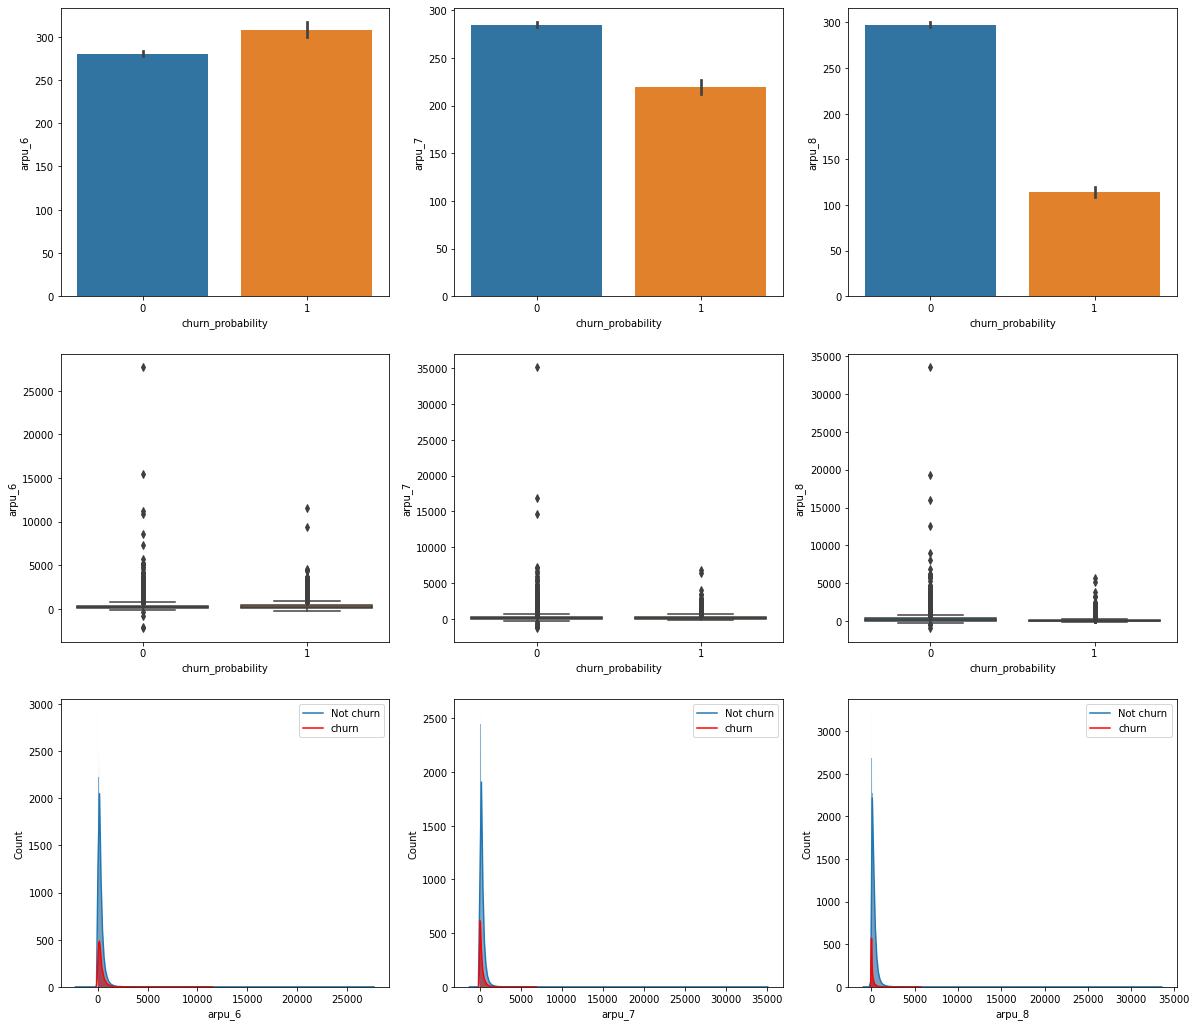

In [55]:
plot_set('arpu_6', 'arpu_7', 'arpu_8', 1, 1, 1)  # ploting arpu of all months

### Creating a new features

age on network or the age variable in months can be represented as a new variable

In [56]:
df["aon_months"] = round(df["aon"]/30.4, 2) # dividing aon by 30.4 to convert to months in train dataset
df["aon_yr"] = round(df["aon"]/365, 0)   # dividing aon by 365 to convert to years in train dataset

df_t1["aon_months"] = round(df_t1["aon"]/30.4, 2) # dividing aon by 30.4 to convert to months in test dataset
df_t1["aon_yr"] = round(df_t1["aon"]/365, 0)  # dividing aon by 365 to convert to years in test dataset

In [57]:
df.describe()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,aon_months,aon_yr
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.0000

C:\Users\Omicium\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


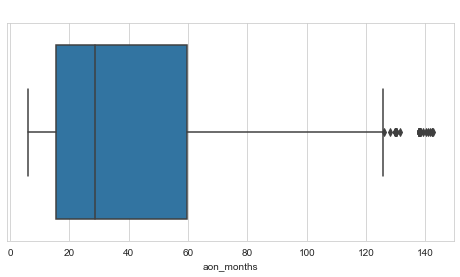

In [58]:
# Quantitative Variables

plt.figure(figsize=(8,4),facecolor='1')
sns.set_style("whitegrid")
ax = sns.boxplot(df['aon_months']) # PLoting the new ly created aon _months feature
ax.set_title('Age on Netwrok - Box Plot',fontsize=14,color='w')
plt.show()

C:\Users\Omicium\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


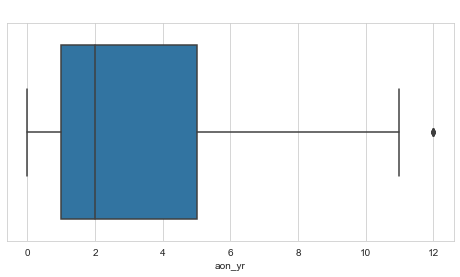

In [59]:
plt.figure(figsize=(8,4),facecolor='1')
sns.set_style("whitegrid")
ax = sns.boxplot(df['aon_yr']) # Plotting the newly created aon_yr feature
ax.set_title('Age on Netwrok - Box Plot',fontsize=14,color='w')
plt.show()

C:\Users\Omicium\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


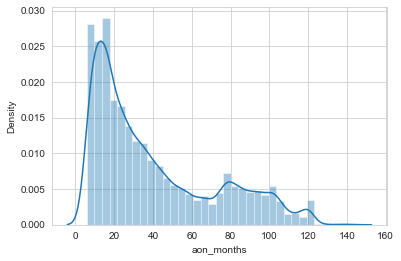

In [60]:
sns.distplot(df['aon_months'],bins=35) # plotting te newwly created aon month feature
plt.show()

In [61]:
# Plot box plot for all columns in the list input_cols.
def box_plot(data,input_cols,ncol):
    leng = len(input_cols)
    if leng%ncol == 0:
        rows = leng//ncol
    else:
        rows = leng//ncol + 1
    
    figure, axes = plt.subplots(nrows=rows, ncols=ncol,figsize=(20,3.5*rows))
    
    for i, xvar in enumerate(input_cols):
            axes[i//ncol,i%ncol].title.set_text(xvar)
            axes[i//ncol,i%ncol].tick_params(axis='x', rotation=45)
            
            axes[i//ncol,i%ncol].boxplot(data[xvar])
            
            
    
    figure.tight_layout(pad=3.0)
    plt.show()

In [62]:
cols_monthly = []
for col in df.columns:
    if ("_6" in col) or ("_7" in col) or ("_8" in col) or ("_diff" in col):
        cols_monthly.append(col)
        
cols_non_monthly = list(set(list(df.columns)) - set(cols_monthly))
cols_non_monthly

['jul_vbc_3g',
 'jun_vbc_3g',
 'aon_yr',
 'aon_months',
 'churn_probability',
 'id',
 'aon',
 'aug_vbc_3g']

In [63]:
cols_monthly_6 = [] # a blank list
for col in cols_monthly:
    if '_6' in col: # if the variable ends with _6
        cols_monthly_6.append(col) # append the above features to the blank list

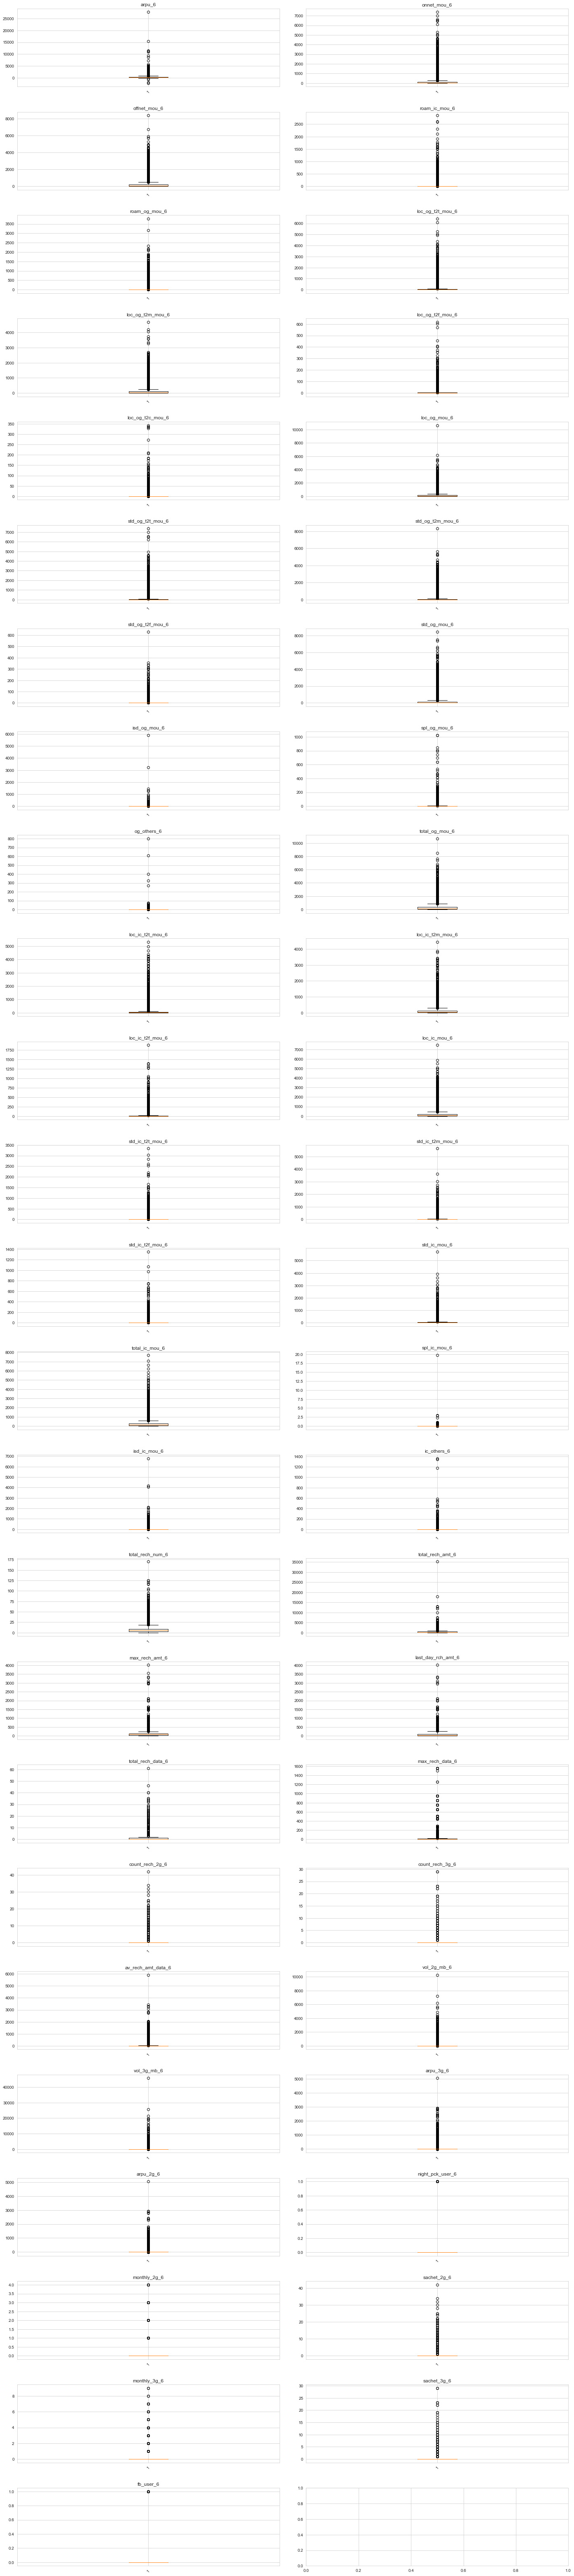

In [64]:
box_plot(df,cols_monthly_6,2)

In [65]:
cols_monthly_7 = [] # crating a blank list
for col in cols_monthly:
    if '_7' in col:  # if the variable ends with _7
        cols_monthly_7.append(col) # append the above features to the blank list

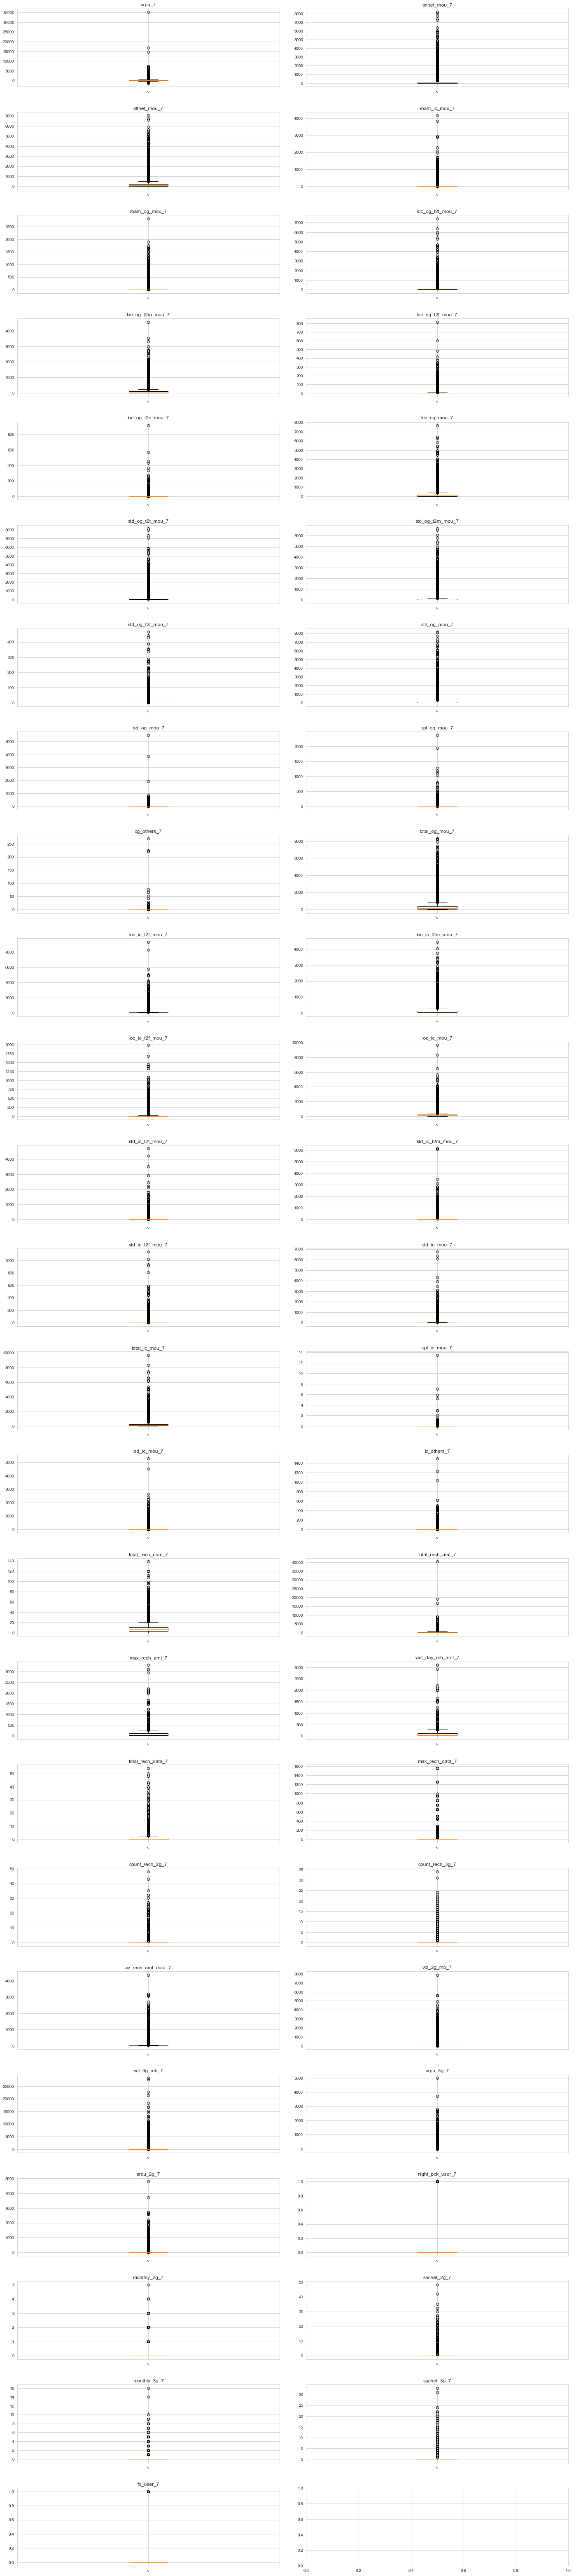

In [66]:
box_plot(df,cols_monthly_7,2)

In [67]:
cols_monthly_8 = [] # creating a blank list
for col in cols_monthly:
    if '_8' in col: # if the variable has _8 at the end
        cols_monthly_8.append(col) # append the above features to the blank list

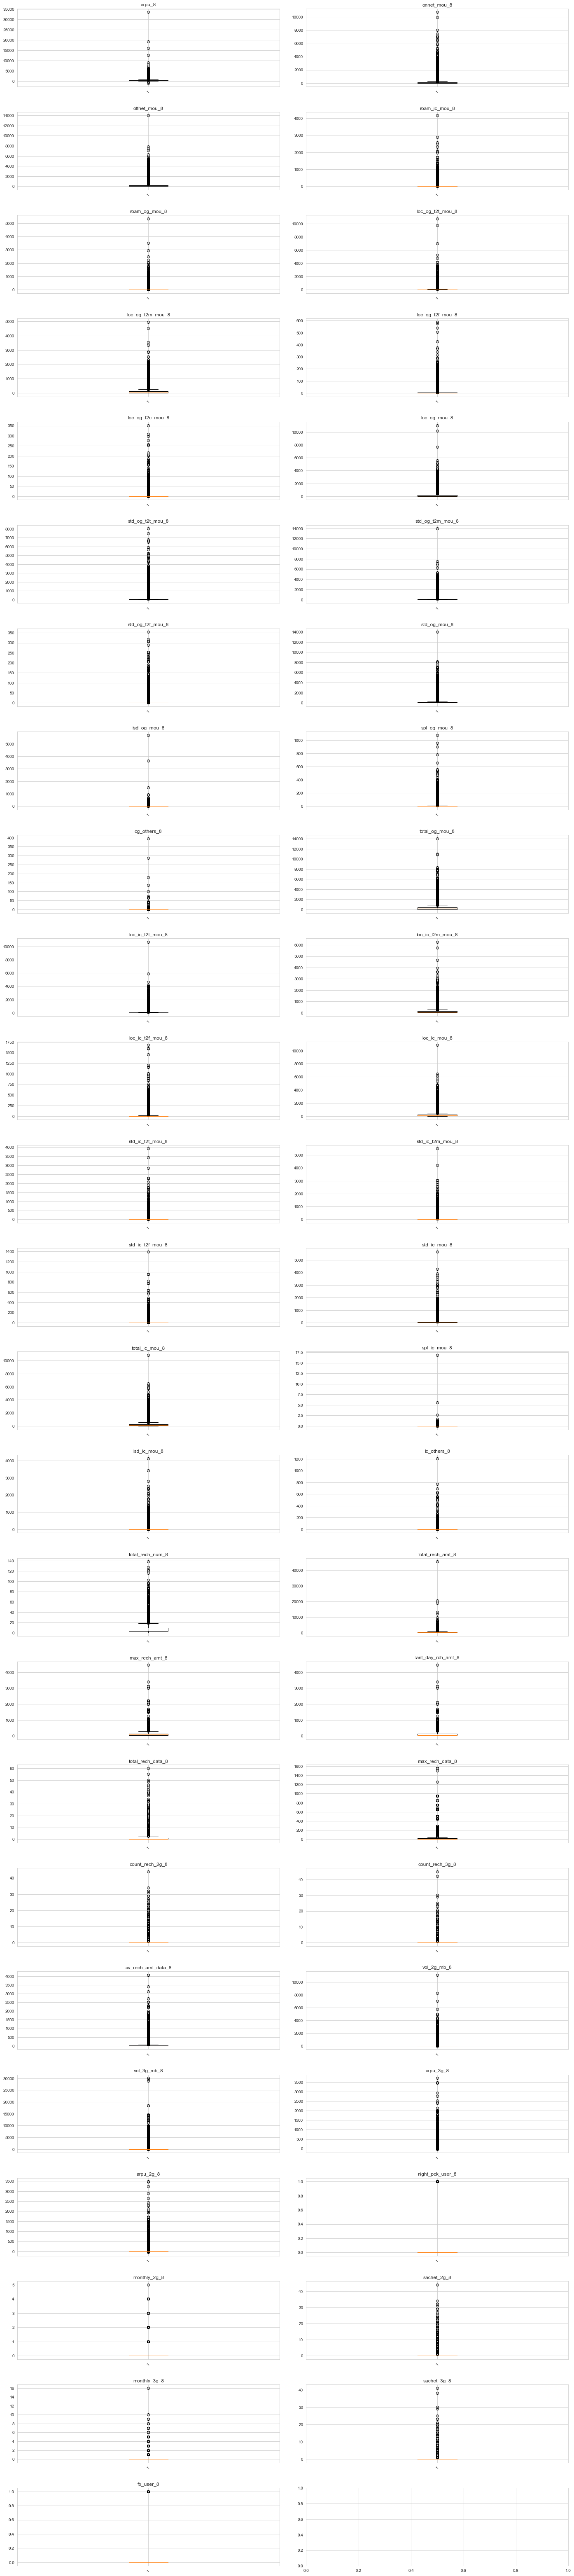

In [68]:
box_plot(df,cols_monthly_8,2)

### Creating Dummy variables

In [69]:
aon_yr_col = pd.get_dummies(df['aon_yr'], drop_first = True) #Creating Dummy variables for aon_yr varianble as it gas only 12 values abd can be represented as a categorical feature
aon_yr_col.head()



,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0


In [70]:
aon_yr_col_t1 = pd.get_dummies(df_t1['aon_yr'], drop_first = True) #Creating Dummy variables for aon_yr varianble as it gas only 12 values abd can be represented as a categorical feature
aon_yr_col_t1['12.0'] = 0
aon_yr_col_t1.head()


,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0


In [71]:
df = pd.concat([df, aon_yr_col ], axis = 1)  # Concatinating new dummy variables with the DataFrame

df_t1 = pd.concat([df_t1, aon_yr_col_t1 ], axis = 1)  # Concatinating new dummy variables with the DataFrame

In [72]:
df.head() # Checking the new features in the datatset

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,aon_months,aon_yr,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
0,0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,65,65,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1958,0.0,0.0,0.0,0,64.41,5.0,0,0,0,0,1,0,0,0,0,0,0,0
1,1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,0,0,0,0.0,1.0,0.0,0.0,145.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,145.0,0.0,0.0,352.91,0.00,0.0,3.96,0.0,0.0,122.07,0.0,0.0,122.08,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0.0,1.0,0.0,710,0.0,0.0,0.0,0,23.36,2.0,0,1,0,0,0,0,0,0,0,0,0,0
2,2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.0,0.00,0.0,0.0,28.94,84.99,0.00,0.0,0.0,0.0,2.89,1.38,0.00,0.00,0.0,0.0,56.49,99.36,0.00,4.51,6.16,6.49,89.86,25.18

# Model Building

In [73]:
# creating a list of high value customers
hi_val= df[df[['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8']].mean(axis=1)> df[['total_rech_amt_6','total_rech_amt_7', 'total_rech_amt_8']].mean(axis=1).quantile(0.1)] 

In [74]:
hi_val.shape

(62848, 167)

In [75]:
hi_val['churn_probability'].value_counts() # a lot of good data is being lost by the method

0    57320
1     5528
Name: churn_probability, dtype: int64

A lot of good data is beeing lost if this method is used

In [76]:
df.shape

(69999, 167)

In [77]:
df_t1.shape

(30000, 166)

In [78]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.85
hi_corr = [column for column in upper.columns if any(upper[column] > 0.85)]

# Drop features 
#df.drop(hi_corr, axis=1, inplace=True)

C:\Users\Omicium\AppData\Local\Temp/ipykernel_4800/2664655086.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [79]:
hi_corr

['std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'total_og_mou_7',
 'total_og_mou_8',
 'std_ic_mou_6',
 'std_ic_mou_7',
 'std_ic_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8',
 'monthly_3g_7',
 'sachet_3g_6',
 'sachet_3g_7',
 'sachet_3g_8',
 'aon_months',
 'aon_yr']

In [80]:
df.drop(hi_corr, axis=1, inplace=True) # dropping highly correlated features fro the traing dataset


In [81]:
df_t1.drop(hi_corr, axis=1, inplace=True) # dropping highly correlated features from the test dataset

In [82]:
x_drop = aon_yr_col.columns.tolist()  
df.drop(x_drop, axis = 1, inplace = True) #Droping some more unnecessary variables



In [83]:
x_drop_t1 = aon_yr_col_t1.columns.tolist()
df_t1.drop(x_drop_t1,  axis = 1, inplace = True) #Droping some more unnecessary variables



#### Spliting the target variable

In [84]:
X = df.drop('churn_probability', axis = 1) # seperating the X from the target variable
y = df['churn_probability'] # Seperating the target varibalefrom the train dataset

#### Train Test Split

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) # train test split

In [86]:
X_test.shape

(14000, 121)

#### Scaling

In [87]:
sc = StandardScaler() # using the standard scaler
X_train_sc = sc.fit_transform(X_train) # fiiting and transforming the train value
X_test_sc = sc.transform(X_test) # only transforming the test value

In [88]:
X_test1_sc = sc.transform(df_t1) # only transforming the test value

In [89]:
X_test1_sc.shape

(30000, 121)

#### PCA


In [90]:
pca = PCA(random_state=42) # performing PCA with random state 42
pca.fit(X_train_sc)

PCA(random_state=42)

In [91]:
var_cum = np.cumsum(pca.explained_variance_ratio_) # Explaing the cumsum variance ratio

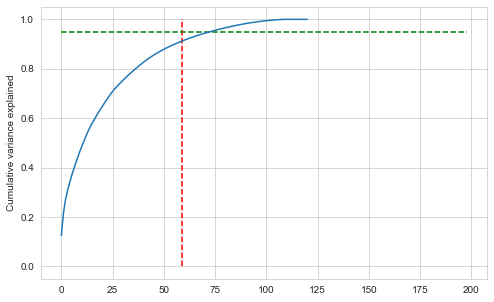

In [92]:
fig = plt.figure(figsize=[8,5])
plt.vlines(x=59, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=198, xmin=0, colors="g", linestyles="--")
plt.plot(var_cum)
plt.ylabel("Cumulative variance explained")
plt.show()

In [93]:
pca_main = PCA(0.95) # calculating pca for 95% variance coverage

In [94]:
df_train_pca = pca_main.fit_transform(X_train_sc) # applying PCA to train data
df_train_pca.shape

(55999, 74)

In [95]:
df_test_pca = pca_main.transform(X_test_sc)  # applying PCA to test data
df_test_pca.shape

(14000, 74)

In [96]:
pca_ag_3 = PCA(n_components = 6) # calculating with 6 PC
#pca_ag_3 = PCA(n_components = 10) # calculating with 2 PC

In [97]:
df_pca = pca_ag_3.fit_transform(X_train_sc)

df_pca.shape

(55999, 6)

In [98]:
tele_df = pd.DataFrame(data = df_pca ,columns = ['PC_1' , 'PC_2', 'PC_3', 'PC_4', 'PC_5', 'PC_6'])

In [99]:
#tele_df = pd.DataFrame(data = df_pca ,columns = ['PC_1' , 'PC_2', 'PC_3', 'PC_4', 'PC_5', 'PC_6', 'PC_7', 'PC_8', 'PC_9', 'PC_10' ])

In [100]:
tele_df.tail()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6
55994,-0.785829,1.183796,-2.948286,1.928373,-1.330351,-0.130216
55995,-2.915167,-0.900867,0.221155,-0.368224,0.212292,0.933435
55996,6.286295,-7.631953,-0.016517,0.797462,0.185860,-2.420086
55997,3.402841,-3.344980,-0.872787,0.040220,1.448622,1.468919
55998,0.706895,0.335090,0.710748,0.524226,-0.285051,-1.615552


In [101]:
print('Explained variation per principal component: {}'.format(pca_ag_3.explained_variance_ratio_)) # printing the explained varience

Explained variation per principal component: [0.12562808 0.08884178 0.055381   0.03719591 0.03085965 0.02898615]


In [102]:
# DF with value for each principal componenet and the target variable
finalDf=pd.concat([tele_df ,df['churn_probability'].reset_index(drop = True)],axis=1) 
finalDf.head() 

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,churn_probability
0,-1.134501,0.832532,1.657747,1.700753,0.165853,-0.427864,0
1,-1.954511,0.405437,1.977887,-1.405377,-0.359229,1.791666,0
2,-3.107668,-1.246832,0.343564,0.149398,0.346277,0.586874,0
3,-2.519563,-0.435334,-1.431381,0.639382,0.289873,0.199107,0
4,-1.571314,0.908487,0.789044,0.335193,1.096679,-0.024787,0


C:\Users\Omicium\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'2 PCA Components'}, xlabel='Principal Component 1', ylabel='Principal Component 2'>

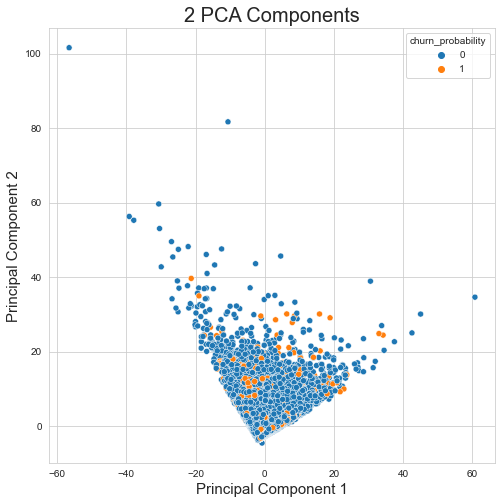

In [103]:
fig=plt.figure(figsize=(8,8))  
ax=fig.add_subplot(1,1,1)  
ax.set_xlabel('Principal Component 1',fontsize = 15)  
ax.set_ylabel('Principal Component 2',fontsize = 15)  
ax.set_title('2 PCA Components',fontsize=20)
sns.scatterplot( finalDf['PC_2'],finalDf['PC_1'], hue = finalDf['churn_probability']) # Plotting 2 PCA components

#### Tuning the model

In [104]:
fold = StratifiedKFold(n_splits = 3) # Setting Stratified Folds as 3

### Logistic regression

In [105]:
grid = [
    {    "penalty":['l1','l2'],
        "class_weight":[{0:1,1:1}, {0:1,1:2}, {0:1,1:3}]
    }    
]

gscv = GridSearchCV(LogisticRegression(solver='lbfgs'), grid, cv = fold , scoring = 'accuracy', verbose = 1, n_jobs = -1)

In [106]:
gfit = gscv.fit(df_train_pca, y_train) # fiiting the grid

Fitting 3 folds for each of 6 candidates, totalling 18 fits


C:\Users\Omicium\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
9 fits failed out of a total of 18.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Omicium\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Omicium\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Omicium\AppData\Roaming\Python\Python39\site-packages\sklearn\lin

In [107]:
print("score : {}".format(gfit.best_score_))
logistic_params = gfit.best_params_ # Checking the parameters
print(logistic_params)

score : 0.9181949514520635
{'class_weight': {0: 1, 1: 2}, 'penalty': 'l2'}


In [108]:
lr_best = gfit.best_estimator_

In [109]:
print(lr_best.coef_.shape)

(1, 74)


In [110]:
y_pred = lr_best.predict(df_test_pca)

In [111]:
print(confusion_matrix(y_test, y_pred)) # printing the confusion matrix

[[12039   539]
 [  583   839]]


In [112]:
print(classification_report(y_test, y_pred)) # Printing te regresssion report

              precision    recall  f1-score   support

           0       0.95      0.96      0.96     12578
           1       0.61      0.59      0.60      1422

    accuracy                           0.92     14000
   macro avg       0.78      0.77      0.78     14000
weighted avg       0.92      0.92      0.92     14000



## Naive bayes

In [113]:
nb = GaussianNB() # Naive bayes using gausian nb

In [114]:
nb.fit(df_train_pca, y_train) 

GaussianNB()

In [115]:
y_pred = nb.predict(df_train_pca) # training

In [116]:
predict_churn = pca_main.transform(X_test_sc) # trainsforming

In [117]:
y_pred_NB = nb.predict(predict_churn) #Predicting
y_pred_NB

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [118]:
print(confusion_matrix(y_test, y_pred_NB)) # printing the confusion matrix

[[5327 7251]
 [ 211 1211]]


In [119]:
print(accuracy_score(y_test, y_pred_NB)) # The accuracy score of the model

0.467


## Random Forest

Tuning max depth

In [120]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(10, 30, 5)}

# instantiate the model
rf = RandomForestClassifier()

# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                 return_train_score=True)
rf.fit(X_train_sc, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(10, 30, 5)},
             return_train_score=True, scoring='accuracy')

In [121]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,10.640306,0.050383,0.089366,0.001364,10,{'max_depth': 10},0.941071,0.940893,0.940000,0.942321,0.942584,0.941374,0.000956,1,0.949597,0.948994,0.948682,0.948369,0.949375,0.949004,0.000446
1,14.391806,0.123592,0.111700,0.000892,15,{'max_depth': 15},0.940893,0.939911,0.941786,0.941964,0.941245,0.941160,0.000732,2,0.973615,0.972120,0.972365,0.973057,0.973147,0.972861,0.000545
2,16.923140,0.166856,0.131649,0.001410,20,{'max_depth': 20},0.940714,0.939554,0.940714,0.942321,0.941870,0.941035,0.000975,3,0.989263,0.990446,0.989910,0.990424,0.990982,0.990205,0.000580
3,18.182173,0.132019,0.140025,0.000489,25,{'max_depth': 25},0.941161,0.939464,0.940982,0.941786,0.941691,0.941017,0.000834,4,0.997790,0.998036,0.997768,0.998482,0.998125,0.998040,0.000260


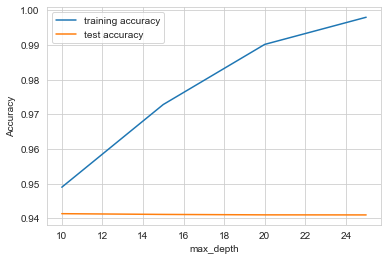

In [122]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Max depth of 10 looks good

#### Finding n estimators

In [123]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(50, 150, 25)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=10)

# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train_sc, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=10),
             param_grid={'n_estimators': range(50, 150, 25)},
             return_train_score=True, scoring='accuracy')

In [124]:
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,5.270110,0.018020,0.045874,0.000634,50,{'n_estimators': 50},0.940982,0.940893,0.940179,0.942232,0.942138,0.941285,0.000787,3,0.949552,0.948905,0.948637,0.948615,0.948929,0.948928,0.000339
1,8.007282,0.109796,0.066417,0.000794,75,{'n_estimators': 75},0.940446,0.940804,0.940714,0.941875,0.942138,0.941195,0.000678,4,0.949731,0.948749,0.948905,0.948459,0.948638,0.948896,0.000442
2,10.587585,0.063835,0.087762,0.001094,100,{'n_estimators': 100},0.940536,0.940536,0.940714,0.942411,0.942495,0.941338,0.000913,2,0.949731,0.949798,0.949240,0.948481,0.949710,0.949392,0.000497
3,13.148440,0.135424,0.107709,0.000891,125,{'n_estimators': 125},0.940893,0.941071,0.940714,0.942054,0.942048,0.941356,0.000578,1,0.949642,0.949106,0.948369,0.948347,0.948817,0.948856,0.000485


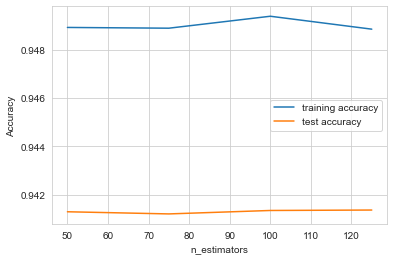

In [125]:
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

n estimators of 100 looks good
### finding max features

In [126]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=10,n_estimators=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train_sc, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=10),
             param_grid={'max_features': [4, 8, 14, 20, 24]},
             return_train_score=True, scoring='accuracy')

In [127]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,4.239864,0.029055,0.091952,0.000399,4,{'max_features': 4},0.941250,0.940893,0.939911,0.942411,0.942495,0.941392,0.000971,3,0.946249,0.946204,0.945936,0.945378,0.946161,0.945986,0.000322
1,7.970092,0.083983,0.089958,0.001598,8,{'max_features': 8},0.940625,0.940089,0.940268,0.941875,0.942048,0.940981,0.000821,5,0.947744,0.947878,0.947164,0.947454,0.947411,0.947530,0.000253
2,13.462786,0.149354,0.086368,0.002239,14,{'max_features': 14},0.940625,0.940804,0.940714,0.942232,0.941602,0.941195,0.000625,4,0.951494,0.950736,0.950222,0.950468,0.950357,0.950655,0.000452
3,19.226477,0.303253,0.084976,0.001712,20,{'max_features': 20},0.941607,0.940446,0.941071,0.943393,0.941870,0.941678,0.000987,1,0.953035,0.952945,0.952432,0.952119,0.952812,0.952669,0.000343
4,22.302342,0.074495,0.082374,0.000798,24,{'max_features': 24},0.940625,0.941071,0.940804,0.942500,0.942048,0.941410,0.000734,2,0.954329,0.953995,0.953771,0.953280,0.953482,0.953771,0.000370


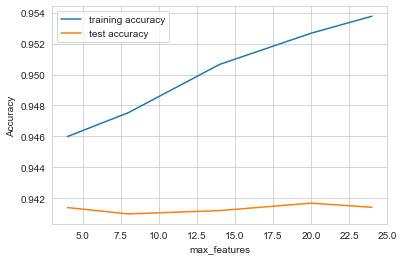

In [128]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

selecting max featuresa as 4


### tuning min_sample_leaf

In [129]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier(max_depth=10,n_estimators=100,max_features=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train_sc, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=10, max_features=4),
             param_grid={'min_samples_leaf': range(100, 400, 50)},
             return_train_score=True, scoring='accuracy')

In [130]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.874750,0.050782,0.090956,0.001162,100,{'min_samples_leaf': 100},0.938839,0.940625,0.940089,0.942321,0.940709,0.940517,0.001123,1,0.941003,0.941427,0.941517,0.941048,0.941004,0.941200,0.000225
1,3.751373,0.043445,0.087762,0.000630,150,{'min_samples_leaf': 150},0.939286,0.939375,0.939375,0.941786,0.940977,0.940160,0.001030,2,0.941271,0.940579,0.941338,0.940400,0.940826,0.940883,0.000370
2,3.640068,0.043456,0.085770,0.000630,200,{'min_samples_leaf': 200},0.938839,0.940982,0.937857,0.942679,0.939370,0.939945,0.001701,3,0.939708,0.940802,0.940534,0.940445,0.940089,0.940316,0.000380
3,3.533762,0.022160,0.084376,0.000787,250,{'min_samples_leaf': 250},0.937768,0.940000,0.937411,0.938304,0.940263,0.938749,0.001167,4,0.939731,0.940177,0.939575,0.937588,0.940469,0.939508,0.001011
4,3.499639,0.038435,0.081992,0.000393,300,{'min_samples_leaf': 300},0.935268,0.936875,0.937321,0.938839,0.936691,0.936999,0.001149,5,0.937543,0.936115,0.939753,0.937342,0.937210,0.937593,0.001189


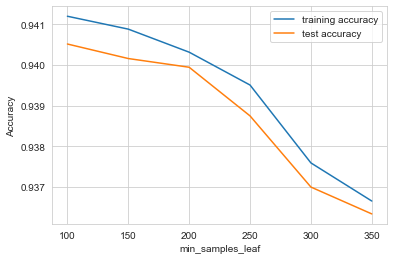

In [131]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

selecting min sample leaf as 100

####  Tuning min sample split

In [132]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(50, 300, 50)}

# instantiate the model
rf = RandomForestClassifier(max_depth=10,n_estimators=100,max_features=4,min_samples_leaf=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train_sc, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=10, max_features=4,
                                              min_samples_leaf=100),
             param_grid={'min_samples_split': range(50, 300, 50)},
             return_train_score=True, scoring='accuracy')

In [133]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.945646,0.074959,0.090357,0.001738,50,{'min_samples_split': 50},0.939286,0.940357,0.938482,0.942679,0.940709,0.940303,0.001426,4,0.941517,0.941650,0.941271,0.940825,0.941094,0.941271,0.000295
1,3.855283,0.048111,0.089561,0.000399,100,{'min_samples_split': 100},0.939821,0.941339,0.939375,0.942143,0.940977,0.940731,0.001009,1,0.941427,0.941338,0.942008,0.940869,0.941295,0.941387,0.000365
2,3.869669,0.026449,0.089161,0.000489,150,{'min_samples_split': 150},0.938929,0.940089,0.939107,0.942143,0.940530,0.940160,0.001157,5,0.941293,0.941606,0.941561,0.940557,0.940982,0.941200,0.000391
3,3.847515,0.036578,0.090553,0.000403,200,{'min_samples_split': 200},0.939911,0.939821,0.939107,0.941875,0.941066,0.940356,0.000985,3,0.941316,0.941784,0.941427,0.941450,0.941228,0.941441,0.000189
4,3.843718,0.044102,0.088761,0.000634,250,{'min_samples_split': 250},0.940000,0.940179,0.939196,0.942768,0.940888,0.940606,0.001207,2,0.941673,0.941360,0.941405,0.940936,0.941071,0.941289,0.000260


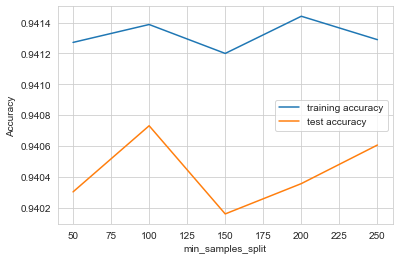

In [134]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Fitting the final model with the best parameters 

- max depth = 10
- n estimators = 100
- max features = 4
- min sample leaf = 100
- min sample split = 50

In [135]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=50,
                             max_features=4,
                             n_estimators=100,
                             random_state=42)

In [136]:
# fit
rf_pca=rfc.fit(X_train_sc,y_train)
#Predict on training set
rtrain_predictions = rf_pca.predict(X_train_sc)
rtrain_predprob = rf_pca.predict_proba(X_train_sc)[:,1]

In [137]:
#lets print some scores
print ("Accuracy :",metrics.roc_auc_score(y_train, rtrain_predictions))
print ("Recall/Sensitivity :",metrics.recall_score(y_train, rtrain_predictions))
print ("AUC Score (Train):",metrics.roc_auc_score(y_train, rtrain_predprob))

Accuracy : 0.7741248386428022
Recall/Sensitivity : 0.5640980735551664
AUC Score (Train): 0.9374904435898163


In [138]:
#lets predict on test dataset
pred_probs_test = rf_pca.predict(X_test_sc)
confusion = metrics.confusion_matrix(y_test, pred_probs_test)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("Roc_auc_score :",(metrics.roc_auc_score(y_test, pred_probs_test)))
print('precision score:',(metrics.precision_score(y_test, pred_probs_test)))
print('Sensitivity/Recall :',(TP / float(TP+FN)))
print('Specificity:',(TN / float(TN+FP)))
print('False Positive Rate:',(FP/ float(TN+FP)))
print('Positive predictive value:',(TP / float(TP+FP)))
print('Negative Predictive value:',(TN / float(TN+ FN)))
print("Accuracy :",(metrics.accuracy_score(y_test,pred_probs_test)))

Roc_auc_score : 0.7830970468607814
precision score: 0.7904761904761904
Sensitivity/Recall : 0.5836849507735584
Specificity: 0.9825091429480044
False Positive Rate: 0.01749085705199555
Positive predictive value: 0.7904761904761904
Negative Predictive value: 0.9542857142857143
Accuracy : 0.942


In [139]:
#lets check with probability cutoff 0.5
y_train_predrf = rf_pca.predict_proba(X_train_sc)[:,1]
y_train_predrf_final = pd.DataFrame({'Churn':y_train, 'Churn_Prob':y_train_predrf})
y_train_predrf_final['Churn_Prob'] = y_train_predrf
y_train_predrf_final['predicted'] = y_train_predrf_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_predrf_final.head()

,Churn,Churn_Prob,predicted
47338,0,0.011898,0
67455,0,0.026205,0
12308,0,0.081223,0
52334,0,0.096369,0
664,1,0.686887,1


In [146]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_predrf_final[i]= y_train_predrf_final.Churn_Prob.map(lambda x: 1 if x > i else 0)

     prob  accuracy     sensi     speci
0.0   0.0  0.101966  1.000000  0.000000
0.1   0.1  0.868158  0.865149  0.868500
0.2   0.2  0.923427  0.707180  0.947981
0.3   0.3  0.934767  0.649212  0.967190
0.4   0.4  0.940928  0.614711  0.977967
0.5   0.5  0.941320  0.564098  0.984152
0.6   0.6  0.934338  0.436602  0.990853
0.7   0.7  0.916249  0.201226  0.997435
0.8   0.8  0.903016  0.049912  0.999881
0.9   0.9  0.898034  0.000000  1.000000


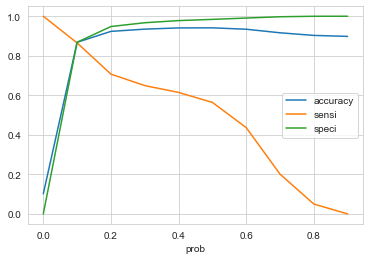

In [148]:


# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_predrf_final.Churn, y_train_predrf_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

#lets plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [149]:
#apply cutoff probability
y_train_predrf_final['final_predicted'] = y_train_predrf_final.Churn_Prob.map( lambda x: 1 if x > 0.1 else 0)
#lets predict on train dataset with optimal cutoff probability
y_train_predrf = rf_pca.predict_proba(X_train_sc)[:,1]
y_train_predrf_final = pd.DataFrame({'Churn':y_train, 'Churn_Prob':y_train_predrf})
y_train_predrf_final['Churn_Prob'] = y_train_predrf
y_train_predrf_final['predicted'] = y_train_predrf_final.Churn_Prob.map(lambda x: 1 if x > 0.1 else 0)
y_train_predrf_final.head()

,Churn,Churn_Prob,predicted
47338,0,0.011898,0
67455,0,0.026205,0
12308,0,0.081223,0
52334,0,0.096369,0
664,1,0.686887,1


In [150]:
#lets find out all scores of train dataset
confusion = metrics.confusion_matrix(y_train_predrf_final.Churn, y_train_predrf_final.predicted)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("Roc_auc_score :",(metrics.roc_auc_score(y_train_predrf_final.Churn, y_train_predrf_final.predicted)))
print('precision score:',(metrics.precision_score(y_train_predrf_final.Churn, y_train_predrf_final.predicted)))
print('Sensitivity/Recall :',(TP / float(TP+FN)))
print('Specificity:',(TN / float(TN+FP)))
print('False Positive Rate:',(FP/ float(TN+FP)))
print('Positive predictive value:',(TP / float(TP+FP)))
print('Negative Predictive value:',(TN / float(TN+ FN)))

Roc_auc_score : 0.86682446562198
precision score: 0.42759456418246344
Sensitivity/Recall : 0.8651488616462347
Specificity: 0.8685000695977252
False Positive Rate: 0.13149993040227484
Positive predictive value: 0.42759456418246344
Negative Predictive value: 0.9826756063537776


In [151]:
#lets predict on test datset with optimal cutoff obtained earlier
y_test_predrf = rf_pca.predict_proba(X_test_sc)[:,1]
y_test_predrf_final = pd.DataFrame({'Churn':y_test, 'Churn_Prob':y_test_predrf})
y_test_predrf_final['Churn_Prob'] = y_test_predrf
y_test_predrf_final['predicted'] = y_test_predrf_final.Churn_Prob.map(lambda x: 1 if x > 0.1 else 0)
y_test_predrf_final.head()

,Churn,Churn_Prob,predicted
57621,0,0.037381,0
39559,0,0.017616,0
41415,0,0.058845,0
47731,0,0.028381,0
64801,0,0.015999,0


In [152]:
#lets find out all scores of test dataset
confusion = metrics.confusion_matrix(y_test_predrf_final.Churn, y_test_predrf_final.predicted)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("Roc_auc_score :",metrics.roc_auc_score(y_test_predrf_final.Churn, y_test_predrf_final.predicted))
print('precision score :',(metrics.precision_score(y_test_predrf_final.Churn, y_test_predrf_final.predicted)))
print('Sensitivity/Recall :',(TP / float(TP+FN)))
print('Specificity:',(TN / float(TN+FP)))
print('False Positive Rate:',(FP/ float(TN+FP)))
print('Positive predictive value:',(TP / float(TP+FP)))
print('Negative Predictive value:',(TN / float(TN+ FN)))

Roc_auc_score : 0.8651435017362266
precision score : 0.41956373551465576
Sensitivity/Recall : 0.8656821378340366
Specificity: 0.8646048656384163
False Positive Rate: 0.1353951343615837
Positive predictive value: 0.41956373551465576
Negative Predictive value: 0.9827399240918128


# Selecting best features
 using RFE + Logistic regression

In [153]:
# Selecting top 60 features using RFE
rfe = RFE(estimator = LogisticRegression(class_weight='balanced', max_iter = 1000), n_features_to_select = 1)

In [154]:
rfe_fit = rfe.fit(X_train_sc, y_train) # Fitting the RFE Logistic regression model

In [155]:
# Creating a dataframe list of the most important features predicter by RFE
df_imp_var = pd.DataFrame((list(zip(X_train.columns, rfe.ranking_ ))), columns =['Features', 'Rank'])
df_imp_var.sort_values('Rank', ascending=True, inplace =True)
df_imp_var.set_index('Rank', inplace=True)
df_imp_var.head(20)

,Features
Rank,
1,loc_ic_mou_8
2,og_others_8
3,spl_ic_mou_8
4,loc_ic_mou_7
5,loc_ic_t2m_mou_8
6,loc_ic_t2f_mou_8
7,loc_ic_t2t_mou_8
8,loc_og_mou_7
9,offnet_mou_7


### Predicition

In [156]:
#df_test_sc_pca = pca_main.transform(X_test1_sc)

In [157]:
#df_test_sc_pca.shape

In [158]:
y_pred_final = rf_pca.predict(X_test1_sc) # predicting the test_1 dataset

In [159]:
sample = pd.read_csv('sample.csv') # Reading Sample.csv for reference
sample.head() 

,id,churn_probability
0,69999,0
1,70000,0
2,70001,0
3,70002,0
4,70003,0


In [160]:
sample['churn_probability'] = y_pred_final # Replacing with the predicted values

In [161]:
sample['churn_probability'].value_counts() # checking the value counts

0    27764
1     2236
Name: churn_probability, dtype: int64

In [162]:
submission = sample.to_csv('submissions.csv', index=False) # Creating the submission file with new predictions

In [163]:
sample.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,1
3,70002,0
4,70003,0


## Final Comments

 - Random forest classifier was use as the final model
 - The following are the parameters used for the model
 - max depth = 10
 - n estimators = 100
 - max features = 4
 - min sample leaf = 100
 - min sample split = 50
 
 - SMOTE was used for upscaling the data imbalance but the results were not up to par with an acceptable model
 - SVM and XGBoost were used for modeling but resulted in the kernal breakdown of the local machine